In [1]:
# Initial imports
import numpy as np
import random
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
#from MCForecastTools import MCSimulation
import datetime
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
%matplotlib inline
import yfinance as yf
from pathlib import Path

In [2]:
#function to extract stock data from yahoo finance
def yahoo_finance(ticker_lst):
    port_df = yf.download(ticker, start='2000-01-01', end='2019-12-31',interval = '1mo')
    port_df.sort_values(by='Date', ascending=False)
    return port_df

In [3]:
# There are 2 tables on the Wikipedia page
# we want the first table
filepath = os.path.join("..\Data", "sp500.csv")
#load sp500 data from the csv file
dataload=pd.read_csv(Path(filepath),infer_datetime_format=True, parse_dates=True, encoding='cp1252')
#drop any NaN values
dataload.dropna(inplace=True)  
dataload

,id,ticker,name,date_added_first
0,0,MMM,3M,1976-08-09
1,1,ABT,Abbott Laboratories,1964-03-31
2,2,ABBV,AbbVie,2012-12-31
3,3,ABMD,Abiomed,2018-05-31
4,4,ACN,Accenture,2011-07-06
...,...,...,...,...
498,500,YUM,Yum! Brands,1997-10-06
499,501,ZBRA,Zebra Technologies,2019-12-23
500,502,ZBH,Zimmer Biomet,2001-08-07
501,503,ZION,Zions Bancorp,2001-06-22


In [4]:
#Drop all columns except Symbol and Date_first_added
dataload.drop(['id', 'name'], axis = 1, inplace = True)
dataload.rename(columns={"date_added_first":"Date_first_added"}, inplace = True)
#reset the index
dataload = dataload.reset_index()
dataload.drop(['index'], axis=1, inplace=True)

In [5]:
#df.columns
earliest_list_date = pd.to_datetime('1901-01-01')
latest_list_date = pd.to_datetime('2000-01-01')

dataload.Date_first_added = dataload.Date_first_added.str[0:10]

added_after_1995 = dataload[pd.to_datetime(dataload['Date_first_added']) >= earliest_list_date ]
added_b4_2000 = added_after_1995[pd.to_datetime(dataload['Date_first_added']) < latest_list_date]
added_b4_2000.reset_index(inplace=True)
added_b4_2000.sort_values(by='Date_first_added',inplace =True)
added_b4_2000.shape

C:\Users\harne\AppData\Local\Temp/ipykernel_23172/1526309115.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  added_b4_2000 = added_after_1995[pd.to_datetime(dataload['Date_first_added']) < latest_list_date]
C:\Users\harne\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(161, 3)

In [6]:
added_b4_2000 = added_b4_2000.drop(['index'], axis =1)
added_b4_2000


,ticker,Date_first_added
80,HSY,1957-03-04
97,KR,1957-03-04
32,BMY,1957-03-04
65,ETR,1957-03-04
96,KMB,1957-03-04
...,...,...
152,VMC,1999-06-30
13,ADI,1999-10-12
98,LEG,1999-10-14
159,XLNX,1999-11-08


### in our testing randint gets lot of repeat tickers in the dataset so instead we are using sample() function

#for i in range (0, urange):
    #stock = added_b4_2000.iloc[random.randint(0, urange)].ticker
    #stock_port.append(stock)
#print(stock_port)


In [97]:
#create a list of stock symbols that have been added to SP500 before 2000
stock_port = []
port_df = pd.DataFrame()
  
#set the number of random stocks to be picked if the user chooses to pick 10 stock portfolio
#to be used in future customization
on_click_10 = 10
#set the number of random stocks to be picked if the user chooses to pick 20 stock portfolio
#to be used in future customization
on_click_20 = 20
#set the number of random stocks to be picked if the user chooses to pick 30 stock portfolio
#to be used in future customization
on_click_30 = 30

#picking random stock tickers using sample() function instead of random.rand.int
random_df=added_b4_2000.sample(n=on_click_20)
ticker_list = []
for i in range(on_click_20):
    ticker = random_df.iloc[i].ticker                    
    ticker_list.append(ticker)
#print(test_list)
ticker = ""
ticker = ' '.join(ticker_list)
print(ticker)


DUK IBM CI NOC ABT COP HAS DTE TJX LOW HES SLB LLY LUMN XOM NEM JPM IPG F BAX


In [98]:
#calling the yfinance function to fetch data for the random list of tickers from sp500 dataset
port_df = yahoo_finance(ticker)

[*********************100%***********************]  20 of 20 completed


In [99]:
port_df.to_csv(r'.\test.csv', sep=',', encoding='utf-8', header='true') 
port_df.dropna(inplace=True)
#port_df['Adj Close'].head(4)

In [100]:
data = port_df['Adj Close']
#data.head()

In [101]:
#try to find mean for each row
#data.drop(['test'], axis=1, inplace=True)
#data['monthly_avg'] =data.sum(axis=1)/on_click_20
#returns = pd.DataFrame()
data['monthly_avg'] = data.sum(axis=1)/on_click_20
data.head(3)

C:\Users\harne\AppData\Local\Temp/ipykernel_23172/3600648895.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['monthly_avg'] = data.sum(axis=1)/on_click_20


,ABT,BAX,CI,COP,DTE,DUK,F,HAS,HES,IBM,...,JPM,LLY,LOW,LUMN,NEM,NOC,SLB,TJX,XOM,monthly_avg
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,8.796127,11.390709,21.523808,7.972313,11.446991,18.298054,14.377996,9.054639,13.270261,68.961304,...,28.301895,34.640339,8.483909,12.089380,15.250112,14.233077,20.281557,1.598616,21.331184,18.663879
2000-02-01,8.958135,9.718886,22.142530,7.435953,9.944055,15.367195,12.151499,9.544313,12.615324,63.124916,...,28.087215,30.787819,9.095843,10.524408,16.559927,12.834545,24.531984,1.561867,19.384672,17.615302
2000-03-01,9.551950,11.178946,22.723745,9.101562,9.614645,16.807169,13.410439,10.112432,16.123905,72.800758,...,30.754848,32.574821,11.105248,11.619888,16.793831,15.126734,25.481071,2.178799,20.188946,19.507950


18.663878935575486


C:\Users\harne\AppData\Local\Temp/ipykernel_23172/3068206137.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['monthly_value'] = num_of_shares * data.iloc[:,20]


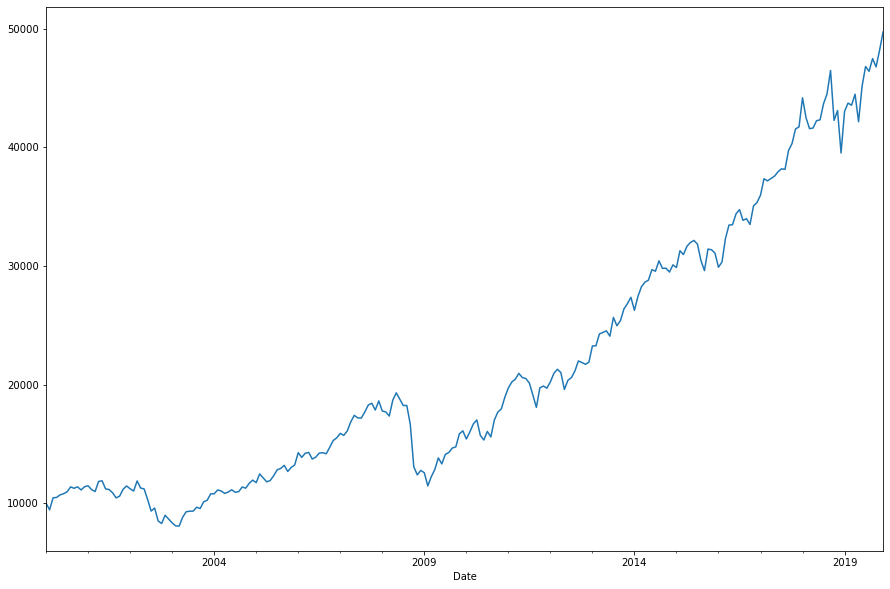

In [102]:
#Value of $10000 invested 
initial_val =  data.iloc[0,20]
num_of_shares = 10000 / initial_val
print(initial_val)
data['monthly_value'] = num_of_shares * data.iloc[:,20] 
rand_plot = data['monthly_value'].plot(figsize= (15,10))
#data

In [89]:
mg_list = ['FLCSX']
#['TNWCX', 'SRFMX', 'PRCOX', 'HAIAX', 'WMLIX', 'DFUSX', 'VPMCX', 'PRBLX', 'DGAGX', 'TISCX', 'AFDAX', 'VDIGX', 'DFELX', 'BIRAX', 'DUSQX', 'MRGAX', 'DFEOX', 'BRLIX', 'VPCCX']
ticker = ""
ticker = ' '.join(mg_list)
print(ticker)
mg_fund_df = yahoo_finance(mg_list)
mg_fund_df.head()

FLCSX
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-01,21.530001,21.959999,20.520000,20.870001,11.348763,0.0
2000-02-01,21.209999,22.270000,21.209999,22.120001,12.028492,0.0
2000-03-01,22.350000,23.469999,21.420000,22.480000,12.224251,0.0
2000-04-01,22.160000,22.670000,19.420000,21.309999,11.588027,0.0
2000-05-01,21.600000,21.600000,19.500000,20.450001,11.120372,0.0


<AxesSubplot:xlabel='Date'>

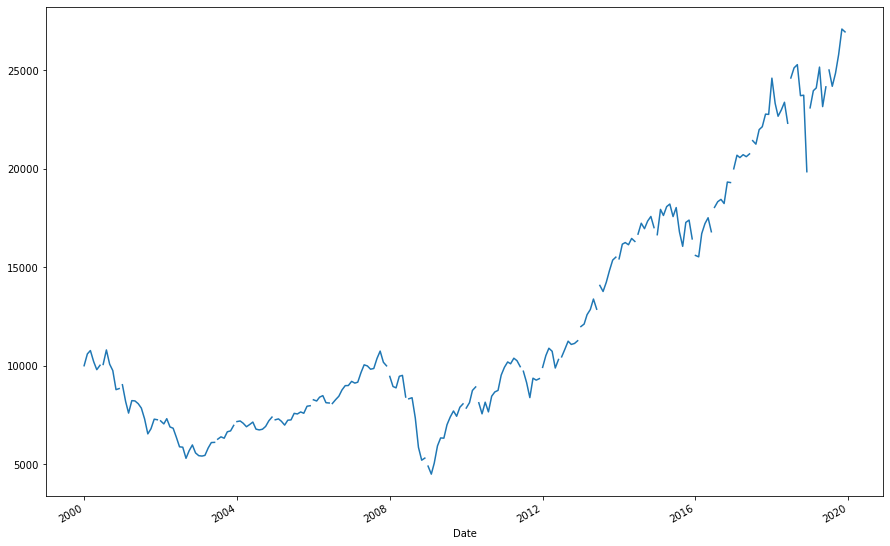

In [90]:
mg_fund_df['monthly_values'] = mg_fund_df['Adj Close'].sum()*10000
mg_fund_df
#Value of $10000 invested 
initial_val =  mg_fund_df['Adj Close'][0]
num_of_shares = 10000 / initial_val
mg_fund_df['monthly_value'] = num_of_shares * mg_fund_df['Adj Close'] 
mg_fund_df['monthly_value'].plot(figsize= (15,10))


In [ ]:
#clean_dataset.mean(axis=1).plot(kind='line', figsize=(15,10))
clean_dataset1 = data.pct_change().dropna()
clean_dataset2= (1+ clean_dataset1).cumprod()
type(clean_dataset1)
clean_dataset2.plot(figsize=(20,10))
clean_dataset1.plot( figsize=(20,10))
#clean_dataset1.hvplot(kind='line', figsize=(20,10),legend=True)

In [ ]:
clean_dataset.plot( figsize=(20,10))

In [ ]:
mgticker = 'FLCSX'
mg_port_df = yf.download(mgticker, start='1993-02-01', end='2021-08-01')
mg_port_df

In [ ]:
mg_port_df['Adj Close'].std().plot()
mgclean_dataset.columns 
#mgclean_dataset['Adj Close'].std().plot()
#mgclean_dataset_mean.plot()